In [861]:
#Samuel Murillo Herrera 202223679
#Alejandra María Yanza Gavíria 202225512
import numpy as np
import random
import matplotlib.pyplot as plt
import sympy as sp

1. Calculo de probabilidad

1. Se reparten cartas, una a la vez, de una baraja de 52 cartas.


a) Si las primeras 2 cartas son espadas, ¿cuál es la probabilidad de que las siguientes 3 cartas también
sean espadas?
b) Si las primeras 3 cartas son todas de espadas, ¿cuál es la probabilidad de que las 2 cartas siguientes
sean también espadas?
c) Si las primeras 4 cartas son todas de espadas, ¿cuál es la probabilidad de que la siguiente carta sea
también una espada?

In [862]:
N=500000
eventoa=0
eventob=0
eventoc=0
cartas = np.array([1.,2.,3.,4.,
                    5.,6.,7.,8.,
                    9.,10.,11.,12.,
                    13.,14.,15.,16.,
                    17.,18.,19.,20.,
                    21.,22.,23.,24.,
                    25.,26.,27.,28.,
                    29.,30.,31.,32.,
                    33.,34.,35.,36.,
                    37.,38.,39.,40.,
                    41.,42.,43.,44.,
                    45.,46.,47.,48.,
                    49.,50.,51.,52.])
cartas1 = np.delete(cartas, [0,4])
cartas2 = np.delete(cartas, [0,4,8])
cartas3 = np.delete(cartas, [0,4,8,12])
for i in range(N):
    #print(cartas)
    np.random.shuffle(cartas1)
    cartas_tomo = cartas1[:3]
    num_espadasa=0
    for c in cartas_tomo:
        if c%4==1:
            num_espadasa+=1
    if num_espadasa == 3:
        eventoa+=1

for i in range(N):
    #print(cartas)
    np.random.shuffle(cartas2)
    cartas_tomo = cartas2[:2]
    num_espadasb=0
    for c in cartas_tomo:
        if c%4==1:
            num_espadasb+=1
    if num_espadasb == 2:
        eventob+=1
for i in range(N):
    #print(cartas)
    np.random.shuffle(cartas3)
    cartas_tomo = cartas3[:1]
    num_espadasc=0
    for c in cartas_tomo:
        if c%4==1:
            num_espadasc+=1
    if num_espadasc == 1:
        eventoc+=1
print(eventoa/N) #a
print(eventob/N) #b
print(eventoc/N) #c

0.008358
0.03802
0.186686


2) Suponga que la probabilidad de exposición a la gripe durante una epidemia es .6. La experiencia ha
demostrado que un suero tiene 80 % de éxito para prevenir que una persona inoculada contraiga la gripe
si se expone a ella. Una persona no inoculada enfrenta una probabilidad de ,90 de contraer la gripe si se
expone a ella. Dos personas, una inoculada y otra no, realizan un trabajo altamente especializado en un
negocio. Suponga que no están en el mismo lugar, no están en contacto con las mismas personas y no
pueden contagiarse entre sí a la gripe. ¿Cuál es la probabilidad de que al menos una de ellas se enferme?


In [863]:
N=10000
eventos=np.zeros((int(N*.6),2))
cuenta=0
posiciones0=random.sample(range(int(N*.6)),int(N*.6*.2))
posiciones1=random.sample(range(int(N*.6)),int(N*.6*.9))
for i in posiciones0:
    eventos[i][0]=1
for i in posiciones1:
    eventos[i][1]=1
for i in eventos:
    if np.sum(i) >= 1:
        cuenta+=1
        #print(i)
#print(cuenta)    
print(cuenta/N)



0.5523


2. Distribuciones de probabilidad discretas
 1. El muestreo de piezas defectuosas de grandes lotes de productos manufacturados da un número de
piezas defectuosas, Y , que sigue una distribución de probabilidad binomial. Un plan de muestreo consiste
en especificar el número de piezas n por incluirse en una muestra y un número de aceptación a. El
lote es aceptado si Y ≤ a y rechazado si Y > a. Denote con p la proporción de piezas defectuosas del
lote. Un ingeniero de control de calidad desea estudiar planes de muestreo alternativos: n = 5, a = 1 y
n = 25, a = 5. Construya las curvas características de operación para ambos planes, haciendo uso de
probabilidades de aceptación en el rango p ∈ [0, 1].


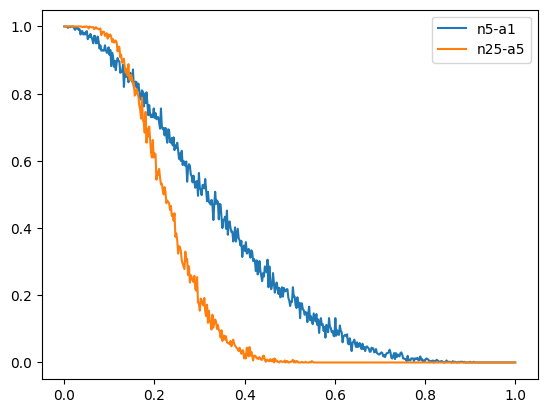

In [864]:
N=500
p=np.linspace(0,1,500)
C5P=np.array([])
C25P=np.array([])
for i in p:
    C5=np.random.binomial(5,i,N)
    C5p=0
    C25=np.random.binomial(25,i,N)
    C25p=0

    for j in C5:
        if j <= 1:
            C5p+=1
    C5p/=N
    C5P=np.append(C5P,C5p)

    for j in C25:
        if j <= 5:
            C25p+=1
    C25p/=N
    C25P=np.append(C25P,C25p)
#print(C5P)
#print(C25P)
plt.plot(p,C5P,label="n5-a1")
plt.plot(p,C25P,label="n25-a5")
plt.legend()


a) Si usted fuera un vendedor que produce lotes con una fracción defectuosa que va de p = 0 a p = ,10,
¿cuál de los dos planes de muestreo preferiría?

Preferiría n=25 y a=5 #Más lotes pasan y por lo tanto son vendidos

b) Si usted fuera un comprador que desea protegerse contra la aceptación de lotes con una fracción
defectuosa que exceda de p = ,30, ¿cuál de los dos planes de muestreo preferiría?

Preferiría n=25 y a=5 #Más lotes se descartan por fracciones defectuosas a comparación de la otra que es más laxa


2. El número de desconexiones del servidor de una companía sigue una distribución de Poisson con una
tasa de una desconexión cada 4 horas.

a) Encuentre el menor valor de n tal que la probabilidad de que haya al menos n desconexiones en
menos de un período de 4 horas es menor que 0.01.

In [865]:
N=1e4
n=0
p=1
eventos=np.random.poisson(1,int(N))
while p >= 0.01:
    p=0
    n+=1
    for e in eventos:
        if e > n:
            p+=1
    p/=N
print(p,n)
print("El menor n es: "+str(n))
"""
for n in range(1,15):
    p=0
    eventos=np.random.poisson(1,int(N))
    for e in eventos:
        if e > n:
            p+=1
    if p/N < 0.01 and p/N != 0:    
        print(p/N,n)        
"""

0.0036 4
El menor n es: 4


'\nfor n in range(1,15):\n    p=0\n    eventos=np.random.poisson(1,int(N))\n    for e in eventos:\n        if e > n:\n            p+=1\n    if p/N < 0.01 and p/N != 0:    \n        print(p/N,n)        \n'

b) Encuentre el menor valor del número de horas h tal que la probabilidad de que no haya desconexiones
en h horas sea menor que 0.02.

In [866]:
N=1e4
p=1
h=0
while p >= 0.02:
    p=0
    h+=1
    eventos=np.random.poisson(h/4,int(N))
    for e in eventos:
        if e == 0:
            p+=1
    p/=N
print(p,h)
print("El menor número de horas es: "+str(h))

0.0178 16
El menor número de horas es: 16


c) Encuentre la probabilidad de que en 3 períodos consecutivos de 4 horas, haya solamente un período
de 4 horas sin desconexiones.

In [867]:
"""
N=1e4
p=0
P=0
eventos=np.random.poisson(1,int(N))
#print(eventos)
c=0
for e in eventos:
    c+=1
    if e==0:
        p+=1
    if c==3 and p==1:
        P+=1
    if c==3:
        c=0
        p=0
P/=N/3
P
"""

'\nN=1e4\np=0\nP=0\neventos=np.random.poisson(1,int(N))\n#print(eventos)\nc=0\nfor e in eventos:\n    c+=1\n    if e==0:\n        p+=1\n    if c==3 and p==1:\n        P+=1\n    if c==3:\n        c=0\n        p=0\nP/=N/3\nP\n'

In [868]:
N=1e4
p=0
eventos=np.random.poisson(1,int(N))
for e in eventos:
    if e == 0:
        p+=1
p/=N #Probabilidad de un periodo sin desconexiones
eventos=np.random.binomial(3,p,int(N))
#print(eventos)
p=0
for e in eventos:
    if e == 1:
        p+=1
p/N

0.4472

d) Encuentre la probabilidad de que el número de desconexiones en 3 períodos consecutivos de 4 horas
sea igual al número esperaod de desconexiones en 3 períodos consecutivos de 4 horas.

In [869]:
N=1e4
p=0
desconexiones_esperadas=0
eventos=np.random.poisson(1,int(N))
for e in eventos:
    if e == 0:
        p+=1
p/=N #Probabilidad de un periodo sin desconexiones
eventos=np.random.binomial(3,p,int(N))
#print(eventos)
p=0
for e in eventos:
    if e == desconexiones_esperadas:
        p+=1
p/N

0.261

3. Distribuciones de probabilidad continuas
1. Suponga que el error en la temperatura en un experimento controlado de laboratorio es una variable
aleatoria continua X, que tiene la siguiente función de densidad de probabilidad:
f(x)=x^2/3 si -1 <= x <= 2, 0 en otro caso
Encuentre las probabilidades:
a) P(0 < X ≤ 1)
b) P(1 < X ≤ 2)

In [870]:
x = sp.symbols('x')
funcion = x**2/3
a = -1
b = 2
integral = sp.integrate(funcion, (x, a, b))
print(integral) #Todo el intervalo - Probabilidad = 1

#a)
a = 0
b = 1
integral = sp.integrate(funcion, (x, a, b))
print(integral)

#b)
a = 1
b = 2
integral = sp.integrate(funcion, (x, a, b))
print(integral)


1
1/9
7/9


2. Se supone que las calificaciones de un examen están normalmente distribuidas con media 78 y varianza
de 36.

a) ¿Cuál es la probabilidad de que una persona que haga el examen alcance calificaciones mayores de
72?

In [871]:
N=1e5
distribucionnormal=np.random.normal(78,6,int(N))
p=0
for e in distribucionnormal:
    if e > 72:
        p+=1
p/=N
p

0.83944

b) Suponga que los estudiantes que alcancen el 10 % más alto de esta distribución reciben una
calificación de A. ¿Cuál es la calificación mínima que un estudiante debe recibir para ganar una
calificación de A?

In [872]:
N=1e5
n=77 #Empezamos en la media
p=1
eventos=np.random.normal(78,6,int(N))
while p >= 0.1:
    p=0
    n+=1
    for e in eventos:
        if e >= n:
            p+=1
    p/=N
print(p,n)
print("La menor calificación para recibir A es: "+str(n))

0.09116 86
La menor calificación para recibir A es: 86


c) ¿Cuál debe ser el punto límite para pasar el examen si el examinador desea pasar a sólo 28,1 % más
alto de todas las calificaciones?

In [873]:
N=1e5
n=77 #Empezamos en la media
p=1
eventos=np.random.normal(78,6,int(N))
while p > 0.281:
    p=0
    n+=1
    for e in eventos:
        if e >= n:
            p+=1
    p/=N
print(p,n)
print("La calificación límite para pasar es: "+str(n))

0.25199 82
La calificación límite para pasar es: 82


d) Aproximadamente qué proporción de estudiantes tienen calificaciones de 5 o más puntos arriba de
la calificación que corta al 25 % más bajo?

In [874]:
N=1e5
n=79 #Empezamos en la media
p=1
eventos=np.random.normal(78,6,int(N))
#print(eventos)
while p > 0.25:
    p=0
    n-=1
    for e in eventos:
        if e < n:
            p+=1
    p/=N
print(p,n)
print("La calificación que corta al 25% más bajo es: "+str(n))
p=0
for e in eventos:
    if e >= n+5:
        p+=1
p/=N
print("La proporción de estudiantes es: "+str(p))


0.20343 73
La calificación que corta al 25% más bajo es: 73
La proporción de estudiantes es: 0.50038


e) Si se sabe que la calificación de un estudiante excede de 72, ¿cuál es la probabilidad de que su
calificación exceda de 84?

In [875]:
N=1e5
p=0
n=0
eventos=np.random.normal(78,6,int(N))
for e in eventos:
    if e > 84:
        p+=1
    if e > 72:
        n+=1
print("La probabilidad es: "+str(p/n))

La probabilidad es: 0.18826178646745542


4. Cadenas de Markov

1. Encuentre la probabilidad de obtener el gen g = [T, G, C, T, C, A, A, A].

In [876]:
Dict = { 0: 'A', 1: 'C', 2:'G', 3:'T'}
#pi=np.array([0.25,0.0,0.5,0.25])
T=np.array([[0.4,0.25,0.3,0.1],
            [0.2,0.25,0.3,0.1],
            [0.2,0.25,0.1,0.1],
            [0.2,0.25,0.3,0.7]])
#p=1
#g=np.array([3,2,1,3,1,0,0,0])
#p*=pi[g[0]]
#for i in range(1,len(g)):
#    p*=T[g[i]][g[i-1]]
#p #7.500000000000001e-06

Prior=np.array([0.25,0.0,0.5,0.25])
State=np.array([3,2,1,3,1,0,0,0])
n = len(State)
p = 1.
   
p *= Prior[State[0]]

for i in range(n-1):
    p *= T[ State[i+1], State[i]]
p


7.500000000000001e-06

2. Estas bases nitrogenadas pasarán por un proceso de traducción donde el objetivo es que se traduzcan
A − U, C − G, G − C, T − A seg´un la siguiente matriz de emisión
Si un gen traducido está dado por gT = [A, C, G, A, G, U, U, U], ¿cuál es la probabilidad de que venga
del gen g anterior?


In [877]:
Dict = { 0: 'U', 1: 'G', 2:'C', 3:'T'}

E=np.array([[0.87,0.0,0.0,0.2],
            [0.05,0.9,0.1,0.1],
            [0.05,0.1,0.9,0.0],
            [0.1,0.0,0.0,0.7]])

#gt=np.array([3,2,1,3,1,0,0,0])
#for i in range(0,len(g)):
#    p*=E[gt[i]][g[i]]
#p #1.7641789247249998e-06

Obs=np.array([3,2,1,3,1,0,0,0])
for i in range(n):
    p *= E[Obs[i], State[i]]
p

1.7641789247249998e-06